<a href="https://colab.research.google.com/github/Hambach-AA/Big-Data-Mining-Lab/blob/main/Lab_2_IABD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# !pip install apyori

In [35]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import pylab
from apyori import apriori

Apriori

In [47]:
def apyori_fun(dataset, min_supports, min_confidence):
  result = []
  times = []
  maxlen = []
  for i in min_confidence:

    maxlen.append(0)

    time_1 = time.time()
    result.append(list(apriori(dataset, min_support = min_supports, min_length = 2, min_confidence = i, min_lift = 2)))
    time_2 = time.time()
    times.append(time_2 - time_1)

    for j in result[-1]:
      if len(set(j[0])) > maxlen[-1]:
        maxlen[-1] = len(set(j[0]))
  
  for i in range(len(min_confidence)):
    print(min_confidence[i])
    print("<---->")
    for j in result[i]:
      print("{}, {}".format(set(j[0]), round(j[1],4)))

  return result, times, maxlen

Построение графиков

In [37]:
def chart(min_confidence, result_1, times_1, maxlen_1, result_2, times_2, maxlen_2, result_3, times_3, maxlen_3):
  
  support = []
  for i in min_confidence:
    support.append(str(i))

  quantity_1 = []
  for i in result_1:
    quantity_1.append(len(i))

  quantity_2 = []
  for i in result_2:
    quantity_2.append(len(i))

  quantity_3 = []
  for i in result_3:
    quantity_3.append(len(i))

  pylab.figure(figsize=(15, 15))
  
  pylab.subplot (3, 3, 1)
  pylab.bar(support, times_1)
  pylab.xlabel("Значение поддержки\ndataset_1")
  pylab.ylabel("Время работы")

  pylab.subplot (3, 3, 2)
  pylab.bar(support, times_2)
  pylab.xlabel("Значение поддержки\ndataset_2")
  pylab.ylabel("Время работы")

  pylab.subplot (3, 3, 3)
  pylab.bar(support, times_3)
  pylab.xlabel("Значение поддержки\ndataset_3")
  pylab.ylabel("Время работы")

  pylab.subplot (3, 3, 4)
  pylab.bar(support, quantity_1)
  pylab.xlabel("Значение поддержки\ndataset_1")
  pylab.ylabel("Количество наборов")

  pylab.subplot (3, 3, 5)
  pylab.bar(support, quantity_2)
  pylab.xlabel("Значение поддержки\ndataset_2")
  pylab.ylabel("Количество наборов")

  pylab.subplot (3, 3, 6)
  pylab.bar(support, quantity_3)
  pylab.xlabel("Значение поддержки\ndataset_3")
  pylab.ylabel("Количество наборов")

  pylab.subplot (3, 3, 7)
  pylab.bar(support, maxlen_1)
  pylab.xlabel("Значение поддержки\ndataset_1")
  pylab.ylabel("MAX набор")

  pylab.subplot (3, 3, 8)
  pylab.bar(support, maxlen_2)
  pylab.xlabel("Значение поддержки\ndataset_2")
  pylab.ylabel("MAX набор")

  pylab.subplot (3, 3, 9)
  pylab.bar(support, maxlen_3)
  pylab.xlabel("Значение поддержки\ndataset_3")
  pylab.ylabel("MAX набор")

  pylab.show()

Чтение dataset

In [38]:
def read_dataset(name):
  dataset = pd.read_csv(name, header = None)
  dataset.fillna(method = 'ffill',axis = 1, inplace = True)
  dataset.head()
  dataset = dataset.to_numpy()
  print(dataset.shape)
  return dataset

In [67]:
min_supports_1 = 0.001
min_supports_2 = 0.003
min_supports_3 = 0.01

min_confidence = [0.7, 0.75, 0.8, 0.85, 0.90, 0.95]


In [40]:
dataset_1 = read_dataset('Market_Basket_Optimisation.csv')
dataset_2 = read_dataset('groceries.csv')
dataset_3 = read_dataset('retail.csv')

(7501, 20)
(9836, 32)
(316, 7)


Apriori

In [68]:
result_1, times_1, maxlen_1 = apyori_fun(dataset_1, min_supports_1, min_confidence)

0.7
<---->
{'pancakes', 'spaghetti', 'bacon'}, 0.0017
{'chocolate', 'mineral water', 'barbecue sauce'}, 0.0013
{'black tea', 'eggs', 'turkey'}, 0.0015
{'frozen smoothie', 'milk', 'black tea'}, 0.0012
{'salmon', 'black tea', 'mineral water'}, 0.0011
{'blueberries', 'eggs', 'mineral water'}, 0.0016
{'pancakes', 'blueberries', 'mineral water'}, 0.0011
{'rice', 'burgers', 'mineral water'}, 0.0011
{'spaghetti', 'cake', 'white wine'}, 0.0011
{'soup', 'mineral water', 'champagne'}, 0.0013
{'protein bar', 'spaghetti', 'chicken'}, 0.0012
{'chocolate', 'red wine', 'tomato sauce'}, 0.0011
{'fromage blanc', 'cooking oil', 'mineral water'}, 0.0012
{'whole wheat pasta', 'cooking oil', 'mineral water'}, 0.0016
{'spaghetti', 'cooking oil', 'red wine'}, 0.0016
{'cottage cheese', 'spaghetti', 'french wine'}, 0.0011
{'eggs', 'tomato sauce', 'mineral water'}, 0.0019
{'spaghetti', 'energy drink', 'grated cheese'}, 0.0011
{'escalope', 'mushroom cream sauce', 'pasta'}, 0.0025
{'ground beef', 'spaghetti', 'ex

In [69]:
result_2, times_2, maxlen_2 = apyori_fun(dataset_2, min_supports_2, min_confidence)

0.7
<---->
{'whole milk', 'baking powder', 'yogurt'}, 0.0033
{'butter', 'coffee', 'whole milk'}, 0.0034
{'butter', 'curd', 'whole milk'}, 0.0049
{'butter', 'whole milk', 'onions'}, 0.0031
{'butter', 'whole milk', 'pork'}, 0.0039
{'curd', 'domestic eggs', 'whole milk'}, 0.0048
{'sugar', 'domestic eggs', 'whole milk'}, 0.0036
{'other vegetables', 'whole milk', 'brown bread', 'root vegetables'}, 0.0032
{'butter', 'whole milk', 'root vegetables', 'yogurt'}, 0.0031
{'butter', 'whole milk', 'yogurt', 'tropical fruit'}, 0.0034
{'other vegetables', 'tropical fruit', 'root vegetables', 'citrus fruit'}, 0.0045
{'curd', 'whole milk', 'yogurt', 'tropical fruit'}, 0.004
{'other vegetables', 'domestic eggs', 'whole milk', 'whipped/sour cream'}, 0.0036
{'other vegetables', 'root vegetables', 'tropical fruit', 'whipped/sour cream'}, 0.0034
{'whole milk', 'yogurt', 'root vegetables', 'tropical fruit'}, 0.0057
{'whole milk', 'yogurt', 'tropical fruit', 'whipped/sour cream'}, 0.0044
{'whole milk', 'root 

In [70]:
result_3, times_3, maxlen_3 = apyori_fun(dataset_3, min_supports_3, min_confidence)

0.7
<---->
{'Bagel', 'Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk'}, 0.0127
{'Pencil', 'Bagel', 'Wine', 'Diaper', 'Eggs', 'Cheese'}, 0.019
{'Pencil', 'Wine', 'Meat', 'Diaper', 'Eggs', 'Cheese'}, 0.0222
{'Pencil', 'Bagel', 'Wine', 'Meat', 'Diaper', 'Eggs', 'Cheese'}, 0.0127
0.75
<---->
{'Bagel', 'Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk'}, 0.0127
{'Pencil', 'Bagel', 'Wine', 'Diaper', 'Eggs', 'Cheese'}, 0.019
{'Pencil', 'Wine', 'Meat', 'Diaper', 'Eggs', 'Cheese'}, 0.0222
{'Pencil', 'Bagel', 'Wine', 'Meat', 'Diaper', 'Eggs', 'Cheese'}, 0.0127
0.8
<---->
{'Bagel', 'Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk'}, 0.0127
{'Pencil', 'Bagel', 'Wine', 'Diaper', 'Eggs', 'Cheese'}, 0.019
{'Pencil', 'Wine', 'Meat', 'Diaper', 'Eggs', 'Cheese'}, 0.0222
{'Pencil', 'Bagel', 'Wine', 'Meat', 'Diaper', 'Eggs', 'Cheese'}, 0.0127
0.85
<---->
{'Bagel', 'Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk'}, 0.0127
{'Pencil', 'Bagel', 'Wine', 'Diaper', 'Eggs', 'Cheese'}, 0.019
{'Pencil', 'Wine', 'Meat', 'Diaper', 'Eggs', 'Che

Графики

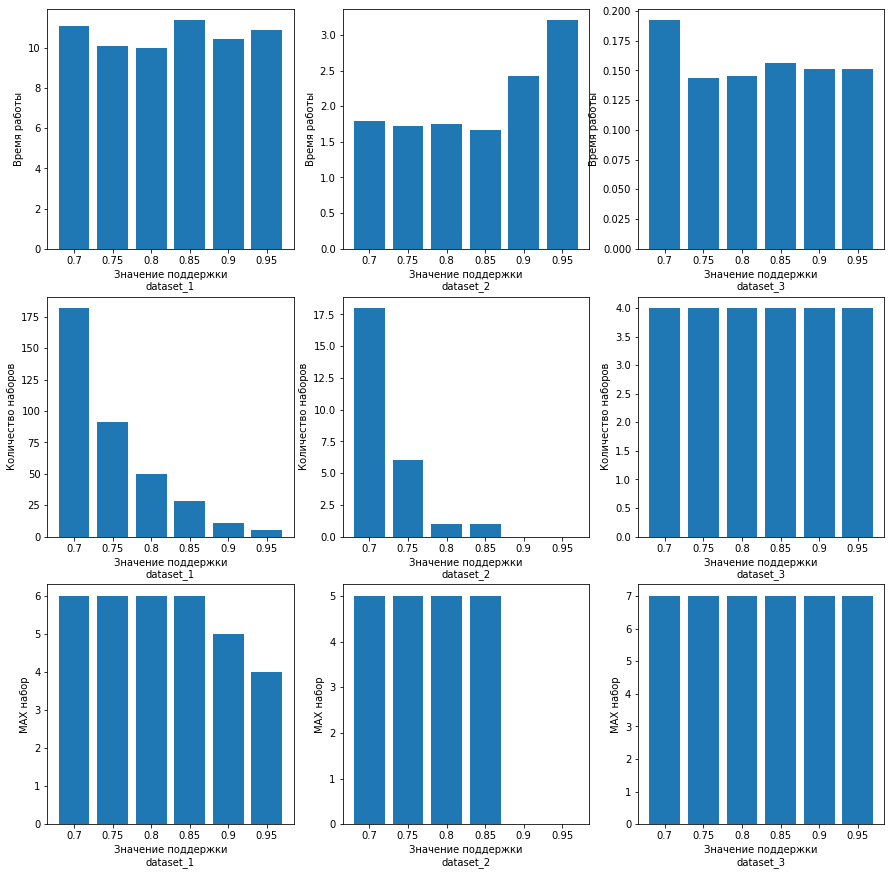

In [71]:
chart(min_confidence, result_1, times_1, maxlen_1, result_2, times_2, maxlen_2, result_3, times_3, maxlen_3)